# ***Decision Trees: Drug dataset***

In [17]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import wget
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

## Download the data

In [2]:
# url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv"
# wget.download(url, "Drugs.csv")

In [3]:
drug_data = pd.read_csv("Drugs.csv")
drug_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Data analysis

In [4]:
drug_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [5]:
drug_data.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

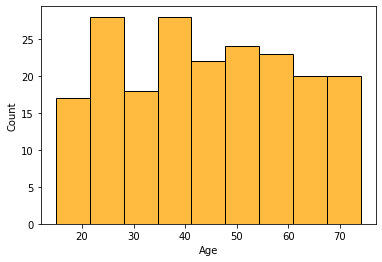

In [6]:
sns.histplot(data=drug_data.Age, color="orange")

In [7]:
print("Size of the dataset: ",drug_data.shape)

Size of the dataset:  (200, 6)


## Feature matrix & data preprocessing

In [8]:
x = drug_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [9]:
y = drug_data.Drug
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

### **Scikit Learn's decision trees** are unable to handle the categorical values and thus we have to convert them to numerical values. 
### ***pandas.get_dummies()*** function will help us to generate dummy indicators/values for the categorical attributes

## Always execute the full code and don't execute it in parts(it will give an error)

In [10]:
# Transforming the data into numerics

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
x.Sex = le_sex.transform(x.Sex) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])
x.BP = le_BP.transform(x.BP)


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['NORMAL', 'HIGH'])
x.Cholesterol = le_Chol.transform(x.Cholesterol) 

x.head()

D:\ProgramData\Anaconda3\envs\MachineLearning\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [11]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [12]:
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

## **Decision Tree model**

In [13]:
# Split the data

train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)

In [14]:
train_x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
79,32,0,1,1,10.840
197,52,1,2,0,9.894
38,39,0,2,1,9.709
24,33,0,1,0,33.486
122,34,1,2,0,22.456


In [15]:
# Create the model

dectree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
dectree.fit(train_x, train_y)

# Make predictions
preds = dectree.predict(test_x)

# Evaluation
print("Decision Tree's accuracy: ", accuracy_score(test_y, preds)*100)

Decision Tree's accuracy:  100.0


## ***Decision Tree Visualization***

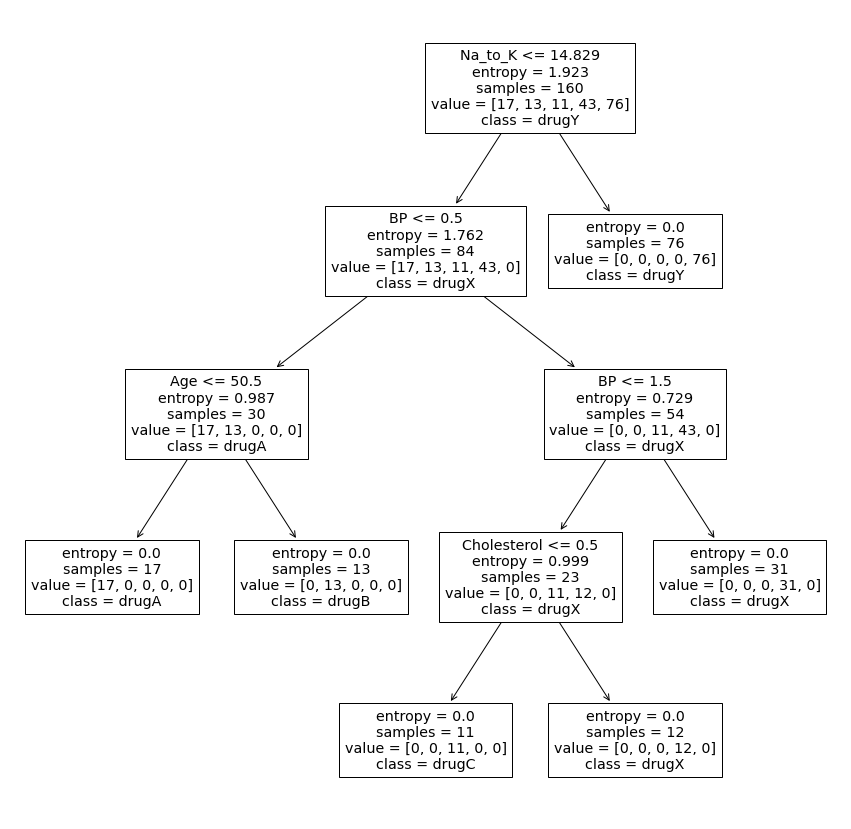

In [16]:
feature_names = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
class_names = ['drugA','drugB','drugC','drugX','drugY']

plt.figure(figsize=(15,15))
sklearn.tree.plot_tree(dectree, feature_names=feature_names, class_names=class_names);

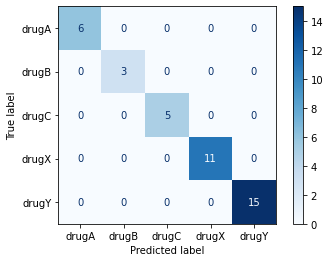

In [27]:
plot_confusion_matrix(dectree, test_x, test_y, cmap=plt.cm.Blues)